# Regular Expression

## Introduction to Regular Expression

### <i>What are regular expressions?</i>

A regular expression is a pattern that describes a set of strings. Regular expressions are constructed analogously to arithmetic expressions by using various operators to combine smaller expressions. Regular expressions are special text strings which follow a specific rule/syntax to represent patterns in a text.

### <i> Common areas of application of regular expression </i>

Common areas of application include:
<li> Text pre-processing like tokenization, removal/replacement of tokens, chunking,etc.
<br>
<i> Example: 
<ul><ul>
<li>Tokenizing a tweet in order to extract only non-callouts and non-hashtag words,
<li>Extracting only noun phrases from a text,etc.
</ul></ul>
<p>
<li> Pattern extraction/searching/matching
<br>
<i> Example: 
<ul><ul>
<li> Extract a text with a specific pattern from another text,
<li> Check if the string entered by a user is a valid email address or not, etc.
<li> Web scraping
</ul></ul>

### <i> Why do we need Regex?</i>
Let's understand this with an example!
Suppose you had to extract all the callouts and hashtags from this tweet:
<i>'"The United Nations is now an obsolete organization #losers tweeted" @therealdonaldtrump #maga #winbig2020'</i>

In [ ]:
# Some Tweet
tweet = '"The United Nations is now an obsolete organization #losers tweeted" @therealdonaldtrump #maga #winbig2020'
print(f'Tweet: {tweet}')

Tweet: "The United Nations is now an obsolete organization #losers tweeted" @therealdonaldtrump #maga #winbig2020


In [ ]:
# We can define a hashtag to be a word in a tweet that starts with a '#'(pound/hash) sign
# We can write a simple python code using string operations to find that, as stated below:

# First split the text on space to get word tokens
word_tokens = tweet.split()
print(f'Word Tokens: {word_tokens}')

Word Tokens: ['"The', 'United', 'Nations', 'is', 'now', 'an', 'obsolete', 'organization', '#losers', 'tweeted"', '@therealdonaldtrump', '#maga', '#winbig2020']


In [ ]:
# Find all the hashtag words from the above list
hashtags = [w for w in word_tokens if w.startswith('#')]
# Let's print what we got
print(f'Hashtags: {hashtags}')

Hashtags: ['#losers', '#maga', '#winbig2020']


We see that we could find all the hashtags with simple string operation here. Let's see if we can do the same for all callouts

In [ ]:
# Similar to a hashtag, we may define a callout to be any word in a tweet that starts with a '@'(at the rate) sign
# Try the approach similar to the hashtags

callouts = [w for w in word_tokens if w.startswith('@')]
print(f'Callouts: {callouts}')

Callouts: ['@therealdonaldtrump']


As we see that the approach that worked for hashtags didn't work for callouts as we have also got a single '@' sign which is not a callout. It happened because the way we chose to define callouts isn't correct. A callout is defined as any word that starts with a '@' symbol and is also followed by characters(can be alphanumeric or underscore) in a tweet. But, if we were supposed to extract such a pattern we cannot match the string simply with various strings. Hence, we need a common pattern for all the callouts. So, for these kinds of complicated patterns in a text, we use regular expressions. Regular expressions support a huge variety of patterns beyond just simply finding where a single string occurred.

To simplify the above, let's solve the given problem using regular expressions

# Python Regular Expressions library - `re`

In [ ]:
import re # re library in Python is used to perform all regex related operations


# Define the regular expression for callouts
# we are planning to use a simple match function to find the callouts for now for simplicity
# The regular expression here means:
# Any text pattern that contains '@' followed by a class of any alphanumeric character and underscore('_')
callout_re = '@[a-zA-Z0-9_]'
# Finding all the callouts using regular expressions
callouts_using_re = [w for w in word_tokens if re.match(callout_re,w)]

In [ ]:
print(f'Callouts using Regular Expressions:{callouts_using_re}')

Callouts using Regular Expressions:['@therealdonaldtrump']


We could solve this problem using several other functions in <i><b>re</b></i> module. For simplicity, we chose to use match function. Which brings me to provide you with a brief introduction to the <i><b>re</b></i> module of Python and the functions that it provides so that when you learn to write a regular expression, it is easy for you to implement it in Python.

## Python's <i>re</i> module

<li>The <i><b>re</b></i> module of Python contains some <i>module level functions</i> as well as some <i>pattern object(the compiled regular expression) methods and attributes</i> which have similar functionalities of pattern extraction and matching.
<li>All these functions take inputs in the given order:
<ul><ol>
<li>Pattern/Regular Expression
<li>String to check
</ol></ul>
<li>All these functions provide iterator,match object or strings as output
<li>Under the hood, these functions simply create a pattern object for you and call the appropriate method on it. They also store the compiled object in a cache, so future calls using the same RE won’t need to parse the pattern again and again
<li>Should you use these module-level functions, or should you get the pattern and call its methods yourself? If you’re accessing a regex within a loop, pre-compiling it will save a few function calls. Outside of loops, there’s not much difference thanks to the internal cache
<li>These module level functions are:
<ul><ul>
<li>re.match()
<li>re.search()
<li>re.split()
<li>re.findall()
</ul></ul>
<li>Other module level functions include:
<ul><ul>
<li>re.complie()
<li>re.sub()
</ul></ul>

### Module level functions

<table border="1" class="docutils" style="width:100%">-
<colgroup>
<col width="14%" />
<col width="43%" />
<col width="43%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head" style='text-align: center'>Function</th>
<th class="head" style='text-align: center'>Purpose</th>
<th class="head" style='text-align: center'>Example</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td style='text-align: left'><tt class="docutils literal"><span class="pre">re.match</span></tt></td>
<td style='text-align: left'>
<li>Determine if the first occurence of the RE matches at the beginning of the string
<li>Return type is a Match object if match found and None otherwise
</td>
<td style='text-align: left'>
<i>If we have a string "abcabcd" and pattern to be matched:"abc", then the match would be found at position(0,3). But if we have a string "babcabcd",it would not match and return NoneType object
</i></td>
</tr>
<tr class="row-odd"><td style='text-align: left'><tt class="docutils literal"><span class="pre">re.search</span></tt></td>
<td style='text-align: left'>
<li>Scan through a string, looking for any location where this RE matches
<li>Returns the first occurence of the RE
<li>Return type is a Match object if match found and None otherwise
</td>
<td style='text-align: left'>
<i>If we have a string "abcabcd" and pattern to be matched:"abc", then the match would be found at position(0,3). Also, if we have a string "babcabcd",it would match at position(1,4)</i></td>
</tr>
<tr class="row-even"><td style='text-align: left'><tt class="docutils literal"><span class="pre">re.split</span></tt></td>
<td style='text-align: left'>
<li>Splits the string on all the substrings that matched the RE
<li>Returns all splitted substrings (does not return the substrings that match the RE)
<li>Returns a list of strings
</td>
<td style='text-align: left'>
<i>If we have a string "abc,abcd" and pattern to be splitted on:",", then it would return a list:['abc','abcd']</i></td>
</tr>
<tr class="row-odd"><td style='text-align: left'><tt class="docutils literal"><span class="pre">re.findall</span></tt></td>
<td style='text-align: left'>
<li>Find all substrings where the RE matches, and returns them as a list
<li>Returns all occurences of the RE
<li>Returns a list of strings
</td>
<td style='text-align: left'>
<i>If we have a string "abcabcd" and pattern to be matched:"abc", than it would return a list:['abc','abc'], that is all occurrences of 'abc in the string
</i></td>
</tr>
<tr class="row-even"><td style='text-align: left'><tt class="docutils literal"><span class="pre">re.compile</span></tt></td>
<td style='text-align: left'>
<li>Compile a regular expression pattern into a regular expression object for faster parsing
<li>Returns a regular expression/pattern object
</td>
<td style='text-align: left'>
<i>Suppose we want to compile RE:'abc', we would write regex = re.compile('abc') and use methods like match and search on the object returned</i></td>
</tr>
<tr class="row-odd"><td style='text-align: left'><tt class="docutils literal"><span class="pre">re.sub</span></tt></td>
<td style='text-align: left'>
<li>Find all substrings where the RE matches, and replace them with a different string
<li>Returns the modified string with the replaced substring
</td>
<td style='text-align: left'>
<i>Suppose we compiled a pattern as '(blue|white|red)' and we want to replace all the colour names by the word 'colour', we would use re.sub as this: re.sub('(blue|white|red)','colour', 'blue socks and red shoes'), where the string to be modified is 'blue socks and red shoes'. We would get the output:'colour socks and colour shoes'
</i></td>
</tr>
</tbody>
</table>

Let us go through a few examples for better clarity

### Examples

**re.split() and re.findall()**

Let's try a few examples related to re.split() and re.findall(). Take a look at my_string first by printing it in the IPython Shell, to determine how you might best match the different steps.

<i><b>Note: It's important to prefix your regex patterns with r to ensure that your patterns are interpreted in the way you want them to. Else, you may encounter problems to do with escape sequences in strings. For example, "\n" in Python is used to indicate a new line, but if you use the r prefix, it will be interpreted as the raw string "\n" - that is, the character "\" followed by the character "n" - and not as a new line.</b></i>

In [ ]:
# The test string
my_string="Let's write RegEx!  Won't that be fun?  No not really because it is the worst.  Don't you love it?  How many distinct words, 0 to 30 , and sentences  0 to 10, can your find?"

# Let's print the string
print(f"Test String: {my_string}")

Test String: Let's write RegEx!  Won't that be fun?  No not really because it is the worst.  Don't you love it?  How many distinct words, 0 to 30 , and sentences  0 to 10, can your find?


<i><b>Example #1<b></i> Suppose we had to extract all sentence tokens from a text. What would you do? The first instinct would be to split the text on full stop('.'). But a sentence could also be a question('?') or an exclamation('!'). So we need a common pattern to split the text into sentences.

In [ ]:
# Write a pattern to match sentence endings: sentence_endings
# A sentence might end with a full stop('.'),question mark('?') or exclamation mark('!')
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(f'All the sentences: {re.split(sentence_endings, my_string)}')

All the sentences: ["Let's write RegEx", "  Won't that be fun", '  No not really because it is the worst', "  Don't you love it", '  How many distinct words, 0 to 30 , and sentences  0 to 10, can your find', '']


Notice that we have an empty string at the end. This is because split returns 2 substrings split by a pattern. As the sentence ends with a question mark, we have an empty string (the last sentence is a concatenation of the sentence, the question mark and an empty string)

<i><b>Example #2<b></i> Suppose we had to extract all numbers(repetition of digits) from the text. The regular expression for this is [0-9]+. Here, [0-9] means a character falling in the digit range and '+' operator means repetition of one or more times. This would be explained in detail in the next section. 

In [ ]:
# Find all numbers(repetition of digits) in my_string and print the result
digits = "[0-9]+"
print(f'All digits in the text: {re.findall(digits, my_string)}')

All digits in the text: ['0', '30', '0', '10']


<i><b>Example #3<b></i> Suppose we had to extract all words from a text. We can define a word to be a repetition of charaters. As we can see in the text above, the words are separated by spaces. Let's try to extract the words by splitting on spaces. The regex for multiple white spaces is '\s+'.

In [ ]:
# Split my_string on spaces and print the result
spaces = r"\s+"
print('fWords by splitting on spaces {re.split(spaces, my_string)}')

fWords by splitting on spaces {re.split(spaces, my_string)}


You might notice that the words contain punctuations attached. This is because we also need to split on punctuations. Now, there are many punctuations. How to split on all that? There is a regular expression for all non-alphanumeric and underscore characters: '\W+'. Let's try splitting on that.

In [ ]:
# Split my_string on spaces and print the result
punctuation_and_spaces = r"\W+"
print(f'Words by splitting on spaces {re.split(punctuation_and_spaces, my_string)}')

Words by splitting on spaces ['Let', 's', 'write', 'RegEx', 'Won', 't', 'that', 'be', 'fun', 'No', 'not', 'really', 'because', 'it', 'is', 'the', 'worst', 'Don', 't', 'you', 'love', 'it', 'How', 'many', 'distinct', 'words', '0', 'to', '30', 'and', 'sentences', '0', 'to', '10', 'can', 'your', 'find', '']


Let's solve this problem with a different approach. Let's use findall. Then the regular expression should be the one that defines what a word is and not the pattern of the delimiter. A naive regular expression for defining a word is '\w+'. '\w' is same as [a-zA-Z0-9_], that is matching a single alphanumeric or underscore character.

In [ ]:
# Split my_string on spaces and print the result
words = r"\w+"
print(f'Words by splitting on spaces {re.findall(words, my_string)}')

Words by splitting on spaces ['Let', 's', 'write', 'RegEx', 'Won', 't', 'that', 'be', 'fun', 'No', 'not', 'really', 'because', 'it', 'is', 'the', 'worst', 'Don', 't', 'you', 'love', 'it', 'How', 'many', 'distinct', 'words', '0', 'to', '30', 'and', 'sentences', '0', 'to', '10', 'can', 'your', 'find']


Notice that we don't get an empty string in the results as we got in the approach using re.split()

<i><b>Example #4<b></i> Suppose we had to extract all capitalized words from this text. The regular expression that we would use is: '[A-Z]\w+'.

In [ ]:
# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(f'All capitalized words: {re.findall(capitalized_words, my_string)}')

All capitalized words: ['Let', 'RegEx', 'Won', 'No', 'Don', 'How']


**Difference between re.search() and re.match()**

As discussed above, re.search() function scans the whole text and finds the first occurrence of a pattern in the text. Whereas, re.match() function only matches the pattern at the begiining of the text.

Let's understand this with an example.

<i><b>Example #1</b></i> Suppose we wanted to find the first occurrence of the pattern 'abc' in a given string. Let's try doing this using the re.match() function first.

In [ ]:
test_string = 'abcde'

print(f'Test String: {test_string}')

Test String: abcde


In [ ]:
# Using re.match() for solving this
match = re.match ('abc', test_string)
# If match found then the function returns a match object otherwise NoneType object
# Let's define a function for testing both the functions
def test(match_result):
    if match_result:
        print(f'Match object: {match_result}')
        print(f'span of match: {match_result.span()}')
        print(f'start index of match {match_result.start()}')
        print(f'end index of match {match_result.end()}')
        print(f'matched string: {match_result.group()}')
    else:
        print('Match Not found')

In [ ]:
#Test it for re.match()
test(match)

Match object: <re.Match object; span=(0, 3), match='abc'>
span of match: (0, 3)
start index of match 0
end index of match 3
matched string: abc


<i><b>Note:</b></i> Observe that for match we would always have the start index = 0 as match function tries to match from the start only.

As we observed, we found a match. Let's try another test string

In [ ]:
#Another test string
test_string = 'cdeabc'
match = re.match('abc',test_string)

test(match)

Match Not found


As you can clearly see, as the string didn't start with the test pattern, it couldn't find a match. 
Let' try re.search() on this test string now.

In [ ]:
# Test it for re.search()
match = re.search('abc',test_string)

test(match)

Match object: <re.Match object; span=(3, 6), match='abc'>
span of match: (3, 6)
start index of match 3
end index of match 6
matched string: abc


As you can see, we found a match at 3rd index. This is because re.search() scans the whole string for the pattern and not just the beginning of the string.

### Performing Matches using compiled regular expression object

- Once you have an object representing a compiled regular expression, what do you do with it? Pattern objects have several methods and attributes

**Method/Attribute**

- match()-Determine if the RE matches at the beginning of the string.
- search()- Scan through a string, looking for any location where this RE matches.
- findall()- Find all substrings where the RE matches, and returns them as a list.
- finditer()- Find all substrings where the RE matches, and returns them as an iterator.

<i><b>Note:</b></i>
<ul>
<li> match() and search() return None if no match can be found. If they’re successful, a match object instance is returned,
<li> containing information about the match: where it starts and ends, the substring it matched, and more.
</ul>

# Compiling a Regular Expressions

In [ ]:
# This regular expression means pattern with only lower case alphabets 

p = re.compile('[a-z]+')
print(f'compiled regular expression object: {p}')

compiled regular expression object: re.compile('[a-z]+')


Now, we can try matching various strings against the RE [a-z]+. An empty string shouldn’t match at all, since + means ‘one or more repetitions’. match() should return None in this case, which will cause the interpreter to print 'Match not found'. You can explicitly print the result of match() to make this clear.

In [ ]:
test(p.match(test_string))
print(f'Explicitly printing the match result: {p.match(test_string)}')

Match object: <re.Match object; span=(0, 6), match='cdeabc'>
span of match: (0, 6)
start index of match 0
end index of match 6
matched string: cdeabc
Explicitly printing the match result: <re.Match object; span=(0, 6), match='cdeabc'>


Now, let’s try it on a string that it should match, such as tempo. In this case, match() will return a match object, so you should store the result in a variable for later use.


In [ ]:
m = p.match('tempo')
test(m)

Match object: <re.Match object; span=(0, 5), match='tempo'>
span of match: (0, 5)
start index of match 0
end index of match 5
matched string: tempo


Now we can query the match object for information about the matching string. Match object instances also have several methods and attributes; the most important ones are:

**Method/Attribute**

- group()-Return the string matched by the RE
- start()-Return the starting position of the match
- end()-Return the ending position of the match
- span()-Return a tuple containing the (start, end) positions of the match

- group() returns the substring that was matched by the RE. start() and end() return the starting and ending index of the match. span() returns both start and end indexes in a single tuple. Since the match() method only checks if the RE matches at the start of a string, start() will always be zero. However, the search() method of patterns scans through the string, so the match may not start at zero in that case.

In [ ]:
# Printing the matched group
print(f'Matched group: {m.group()}')

# Printing the start and end index of the match
print(f'Start and end indices: {m.start(), m.end()}')

# Print the whole span of match in terms of a tuple
print(f'Span of the match: {m.span()}')

Matched group: tempo
Start and end indices: (0, 5)
Span of the match: (0, 5)


In [ ]:
# Let's change the test string - 
# It will not match as the beginning of the string does not contain alphanumeric or underscore characters
# Output will be None
print(p.match('::: message'))

m = p.search('::: message')
print(f'Match object: {m}')

# Checking the match string
print(f'Matched string: {m.group()}')

# Checking the span
print(f'Matched span: {m.span()}')

None
Match object: <re.Match object; span=(4, 11), match='message'>
Matched string: message
Matched span: (4, 11)


## Writing a regular expression

- Regular expressions are constructed analogously to arithmetic expressions by using various operators to combine smaller expressions.
- Regular expressions like any arithmetic expression contains these components:
<ul>
<li>literals (constant values like exact characters:'a','b','_','0','9','w','d',etc)
<li>operators/metacharacters(like '+','-','^','[',']','(',')','\w','\d',etc.)
</ul>
- Metacharacters are the building blocks of regular expressions. Characters in RegEx are understood to be either a metacharacter with a special meaning or a regular character with a literal meaning
- The fundamental building blocks are the regular expressions that match a single character. Most characters, including all letters and digits, are regular expressions that match themselves. Any metacharacter with special meaning may be quoted by preceding it with a backslash

### Metacharacters

<table border="1" class="docutils" style="width:100%">-
<colgroup>
<col width="14%" />
<col width="43%" />
<col width="43%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head" style='text-align: center'>Type of operation</th>
<th class="head" style='text-align: center'>Description</th>
<th class="head" style='text-align: center'>Metacharacters</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td style='text-align: left'><tt class="docutils literal"><span class="pre">Character Matching</span></tt></td>
<td style='text-align: left'>
Used to match a single character at a given position
</td>
<td style='text-align: left'>
<li>Escape codes like \w,\d,\b,\W,\s,\S,\B,etc.
<li>Dot(.)
<li>Caret(^)
<li>Dollar
</td>
</tr>
<tr class="row-odd"><td style='text-align: left'><tt class="docutils literal"><span class="pre">Escaping</span></tt></td>
<td style='text-align: left'>
To alter the normal meaning of a symbol according to RE
</td>
<td style='text-align: left'>
<li>\
</td>
</tr>
<tr class="row-even"><td style='text-align: left'><tt class="docutils literal"><span class="pre">Alteration</span></tt></td>
<td style='text-align: left'>
Logical ORing
</td>
<td style='text-align: left'>
<li>|
</td>
</tr>
<tr class="row-odd"><td style='text-align: left'><tt class="docutils literal"><span class="pre">Repetition</span></tt></td>
<td style='text-align: left'>
To notate repetition in a pattern
</td>
<td style='text-align: left'>
<li>Greedy(Match as much as possible)
<ul>
<li>Star(*)
<li>+
<li>?
<li>{m}
<li>{m,n}
<li>{,n}
<li>{m,}
</ul>
<li>Non-Greedy(match as less as possible)
<ul>
<li>*?
<li>+?
<li>??
<li>{m,n}?
</ul>
</td>
</tr>
<tr class="row-even"><td style='text-align: left'><tt class="docutils literal"><span class="pre">Concatenation</span></tt></td>
<td style='text-align: left'>
Concatenating sub expressions to indicate sequence in sub patterns
</td>
<td style='text-align: left'>
<li>pattern1pattern2(example: 'a' and 'b' are 2 patterns,their concatenation 'ab' will mean 'a' followed by 'b')
</td>
</tr>
<tr class="row-odd"><td style='text-align: left'><tt class="docutils literal"><span class="pre">Ranging and listing</span></tt></td>
<td style='text-align: left'>
Used to list a set/range of characters
</td>
<td style='text-align: left'>
<li> Character Set
<ul>
<li> [abc], where a,b,c are literals
</ul>
<li> Character Ranging
<ul>
<li> [a-b], where a and b are literals
</ul>
</td>
</tr>
<tr class="row-odd"><td style='text-align: left'><tt class="docutils literal"><span class="pre">Exclusion</span></tt></td>
<td style='text-align: left'>
Used to exclude a set/range of characters
</td>
<td style='text-align: left'>
<li> [^abc], where a,b,c are literals
</td>
</tr>
<tr class="row-odd"><td style='text-align: left'><tt class="docutils literal"><span class="pre">Grouping</span></tt></td>
<td style='text-align: left'>
Use to apply an operation on a group of expressions
</td>
<td style='text-align: left'>
<li> Index Captured('()')
<li> Extensions
<ul>
<li>Non-capturing
<ul>
<li>(?:)
<li>(?=)
<li>(?!),etc.
</ul>
<li>Named groups
<ul>
<li>(?P),etc.
</ul>
</ul>
</td>
</tr>
</tbody>
</table>

***Precedence order of operations***
<ol>
<li>Escaping
<li>Exclusion
<li>Ranging and Listing
<li>Grouping
<li>Repetition
<li>Concatenation
<li>Alteration
</ol>

# re Pattern Syntax

This will be the bulk of this lecture on using re with Python. Regular expressions support a huge variety of patterns beyond just simply finding where a single string occurred. 

We can use *metacharacters* along with re to find specific types of patterns. 

Since we will be testing multiple re syntax forms, let's create a function that will print out results given a list of various regular expressions and a phrase to parse:

In [ ]:
# Function to match multiple patterns iteratively

def multi_re_find(patterns,phrase):
    '''
    Takes in a list of regex patterns
    Prints a list of all matches
    '''
    for pattern in patterns:
        print(f'Searching the phrase using the re check: {pattern}\n{re.findall(pattern,phrase)}\n')

#### Metacharacters matching single character

1. ** <code>.</code> Dot.**
- This matches any character except a newline.If the DOTALL flag has been specified, this matches any character including a newline.

In [ ]:
# Try an example to explain

result=re.findall(r'.','Hindsight Technology Soltions has an extremely strong team')
print(f'Matched result would be all the characters: {result}')

Matched result would be all the characters: ['H', 'i', 'n', 'd', 's', 'i', 'g', 'h', 't', ' ', 'T', 'e', 'c', 'h', 'n', 'o', 'l', 'o', 'g', 'y', ' ', 'S', 'o', 'l', 't', 'i', 'o', 'n', 's', ' ', 'h', 'a', 's', ' ', 'a', 'n', ' ', 'e', 'x', 't', 'r', 'e', 'm', 'e', 'l', 'y', ' ', 's', 't', 'r', 'o', 'n', 'g', ' ', 't', 'e', 'a', 'm']


In [ ]:
# Let's take a string containing the new line character. Will it match the newline character or not?
newlineRegex = re.compile('.*') 
newlineRegex.search('Serve the public trust.\nProtect the innocent.\nUphold the law.').group()

'Serve the public trust.'

We can clearly see that the regex matched the first occurence of the pattern and it escaped the newline character.

In [ ]:
# Let's try it with the DOTALL flag
newlineRegex = re.compile('.*', re.DOTALL) 
newlineRegex.search('Serve the public trust.\nProtect the innocent.\nUphold the law.').group()

'Serve the public trust.\nProtect the innocent.\nUphold the law.'

Now we see that we have matched the newline character as well

In [ ]:
# Let's see which words rhyme with 'at' in the given text
atRegex = re.compile(r'.at')
atRegex.findall('The cat in the hat sat on the flat mat.')

['cat', 'hat', 'sat', 'lat', 'mat']

1. **<code>^</code> Caret**
- This Matches an empty string at the start of the string and in MULTILINE mode also matches immediately after each newline.

In [ ]:
# Example: Let's say we had to match the string 'Hello' in the beginning of a string
beginsWithHello = re.compile(r'^Hello')
m = beginsWithHello.search('Hello world!')
test(m)

Match object: <re.Match object; span=(0, 5), match='Hello'>
span of match: (0, 5)
start index of match 0
end index of match 5
matched string: Hello


In [ ]:
# Let's change the string to understand how it works
beginsWithHello = re.compile(r'^Hello')
m = beginsWithHello.search('HHello world!')
test(m)

Match Not found


1. **<code>$</code> Dollar**
- Matches an empty string at the end of the string or just before the newline at the end of the string, and in MULTILINE mode also matches  - before a newline

- foo matches both ‘foo’ and ‘foobar’,  foo$ matches only ‘foo’

- for foo.$ in 'foo1\nfoo2\n' matches ‘foo2’ normally, but ‘foo1’ in MULTILINE mode

In [ ]:
# Example1

foo_example = re.findall(r'foo.$','foo1\nfoo2\n' )
print(f'Without MULTILINE: {foo_example}') 

Without MULTILINE: ['foo2']


In [ ]:
# Example2

foo_example = re.findall(r'foo.$','foo1\n foo3 foo2\n',re.MULTILINE )
print('What will dot match',re.findall(r'foo.','foo1\n foo3 foo2\n',re.MULTILINE ))
print('MULTILINE does not make dot match newline', re.findall(r"foo.*","foo1\n foo3\n foo2",re.MULTILINE ))
print(f'With MULTILINE we got all the ending foos: {foo_example}')

What will dot match ['foo1', 'foo3', 'foo2']
MULTILINE does not make dot match newline ['foo1', 'foo3', 'foo2']
With MULTILINE we got all the ending foos: ['foo1', 'foo2']


In [ ]:
# Example
# As we see here, although search should return the first occurence of a pattern,
#we get the last character of the string
# This is because the pattern is to match the ending digit of the string
endsWithNumber = re.compile(r'\d$')

m = endsWithNumber.search('Your number is 42') #<--- That's for you Dhiksha
test(m)

Match object: <re.Match object; span=(16, 17), match='2'>
span of match: (16, 17)
start index of match 16
end index of match 17
matched string: 2


In [ ]:
# We would not get any matches if the string didn't end with a digit
m = endsWithNumber.search('Your number is forty two.')
test(m)

Match Not found


The  **<code>r'^\d+$'</code> ** regular expression string matches strings that both begin and end with one or more numeric characters. Enter the following into the interactive shell:

In [ ]:
wholeStringIsNum = re.compile(r'^\d+$')
m = wholeStringIsNum.search('1234567890')
test(m)

Match object: <re.Match object; span=(0, 10), match='1234567890'>
span of match: (0, 10)
start index of match 0
end index of match 10
matched string: 1234567890


In [ ]:
# The regex doesn't match any alphanumerics
m = wholeStringIsNum.search('12345xyz67890')
test(m)

Match Not found


In [ ]:
# The regex doesn't allow spaces in between
m = wholeStringIsNum.search('12 34567890')
test(m)

Match Not found


#### Escape Codes

You can use special escape codes to find specific types of patterns in your data, such as digits, non-digits, whitespace, and more. For example:

<table border="1" class="docutils">-
<colgroup>
<col width="14%" />
<col width="86%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Code</th>
<th class="head">Meaning</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">\d</span></tt></td>
<td>a digit</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">\D</span></tt></td>
<td>a non-digit</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">\s</span></tt></td>
<td>whitespace (tab, space, newline, etc.)</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">\S</span></tt></td>
<td>non-whitespace</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">\w</span></tt></td>
<td>alphanumeric</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">\W</span></tt></td>
<td>non-alphanumeric</td>
</tr>
</tbody>
</table>

Escapes are indicated by prefixing the character with a backslash <code>\</code>. Unfortunately, a backslash must itself be escaped in normal Python strings, and that results in expressions that are difficult to read. Using raw strings, created by prefixing the literal value with <code>r</code>, eliminates this problem and maintains readability.

Personally, I think this use of <code>r</code> to escape a backslash is probably one of the things that block someone who is not familiar with regex in Python from being able to read regex code at first. Hopefully after seeing these examples this syntax will become clear.

In [ ]:
# Try all examples at once or one by one
# Currently \W matches all the non-alphanumeric/underscore character 
# Note that it matches spaces

test_phrase = 'This is a string with some numbers 1233 and a symbol #hashtag'

test_patterns=[ #r'\d+', # sequence of digits
                #r'\D+', # sequence of non-digits
                #r'\s+', # sequence of whitespace
                #r'\S+', # sequence of non-whitespace
                #r'\w+', # alphanumeric and underscore characters
                r'\W+', # non-alphanumeric or underscore
                ]

multi_re_find(test_patterns,test_phrase)

Searching the phrase using the re check: \W+
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' #']



**Alteration(|)**
- A|B, where A and B can be arbitrary REs, creates a regular expression that will match either A or B. An arbitrary number of REs can be separated by the '|' in this way. This can be used inside groups (see further) as well. As the target string is scanned, REs separated by '|' are tried from left to right. When one pattern completely matches, that branch is accepted. This means that once A matches, B will not be tested further, even if it would produce a longer overall match. In other words, the '|' operator is never greedy. To match a literal '|', use \|, or enclose it inside a character class, as in [|].

In [ ]:
# Example
# If the string begins with either of man and woman, it gets matched
m1=re.findall(r'^man|^woman','mankind')
print('Begins with a man or a woman:',m1)
m2=re.findall(r'^man|^woman','womankind')
print('Begins with a man or a woman:',m2)

Begins with a man or a woman: ['man']
Begins with a man or a woman: ['woman']


#### Repetition Syntax

There are five ways to express repetition in a pattern:

   1. A pattern followed by the meta-character <code>*</code> is repeated zero or more times. 
   2. Replace the <code>*</code> with <code>+</code> and the pattern must appear at least once. 
   3. Using <code>?</code> means the pattern appears zero or one time. 
   4. For a specific number of occurrences, use <code>{m}</code> after the pattern, where **m** is replaced with the number of times the pattern should repeat. 
   5. Use <code>{m,n}</code> where **m** is the minimum number of repetitions and **n** is the maximum. Leaving out **n** <code>{m,}</code> means the value appears at least **m** times, with no maximum.
    
Now we will see an example of each of these using our multi_re_find function:

In [ ]:
test_phrase = 'sdsd..sssddd...sdddsddd...dsds...dsssss...sdddd'

test_patterns = [ #'sd*',       # s followed by zero or more d's
                  #'sd+',       # s followed by one or more d's
                  'sd?',        # s followed by zero or one d's
                  #'sd{3}',     # s followed by three d's
                  'sd{2,3}',    # s followed by two to three d's
                ]

multi_re_find(test_patterns,test_phrase)

Searching the phrase using the re check: 'sd?'
['sd', 'sd', 's', 's', 'sd', 'sd', 'sd', 'sd', 's', 's', 's', 's', 's', 's', 'sd']


Searching the phrase using the re check: 'sd{2,3}'
['sddd', 'sddd', 'sddd', 'sddd']




1. **<code>*</code> Star**
- Causes the resulting RE to match 0 or more repetitions of the preceding RE, as many repetitions as are possible. ab* will match ‘a’, ‘ab’, or ‘a’ followed by any number of ‘b’s.


In [ ]:
batRegex = re.compile(r'Bat(wo)*man')
mo1 = batRegex.search('The Adventures of Batman')
mo1.group()
#For 'Batman', the (wo)* part of the regex matches zero instances of wo in the string;

'Batman'

In [ ]:
mo2 = batRegex.search('The Adventures of Batwoman')
mo2.group()
#for 'Batwoman', the (wo)* matches one instance of wo

'Batwoman'

In [ ]:
mo3 = batRegex.search('The Adventures of Batwowowowoman')
mo3.group()
#'Batwowowowoman', (wo)* matches four instances of wo.

'Batwowowowoman'

In [ ]:
batRegex = re.compile(r'Bat(wo)+man')
mo1 = batRegex.search('The Adventures of Batwoman')
mo1.group()
# While * means “match zero or more,” the + (or plus) means “match one or more.”
#Unlike the star, which does not require its group to appear in the matched string, 
#the group preceding a plus must appear at least once.

'Batwoman'

1. **<code>+</code> **
-  Causes the resulting RE to match 1 or more repetitions of the preceding RE. ab+ will match ‘a’ followed by any non-zero number of ‘b’s; it will not match just ‘a’.

In [ ]:
# In this case the 'wo' part has to me present at least once to obtain a match
batRegex = re.compile(r'Bat(wo)+man')
mo1 = batRegex.search('The Adventures of Batwoman')
mo1.group()

'Batwoman'

In [ ]:
# In this case multiple wo get matched
mo2 = batRegex.search('The Adventures of Batwowowowoman')
mo2.group()

'Batwowowowoman'

In [ ]:
# We need at least one wo in the text
# It will not match
mo3 = batRegex.search('The Adventures of Batman')
test(mo3)

Match Not found


- The regex Bat(wo)+man will not match the string 'The Adventures of Batman' because at least one wo is required by the plus sign
- If you need to match an actual plus sign character, prefix the plus sign with a backslash to escape it: \+.

1. **<code>?</code> **
- Causes the resulting RE to match 0 or 1 repetitions of the preceding RE. ab? will match either ‘a’ or ‘ab’.

In [ ]:
# Let's try an example
# Here the regex would match Batman as wo needs to be present 0 or 1 time
batRegex = re.compile(r'Bat(wo)?man')
mo1 = batRegex.search('The Adventures of Batman')
test(mo1)

Match object: <re.Match object; span=(18, 24), match='Batman'>
span of match: (18, 24)
start index of match 18
end index of match 24
matched string: Batman


In [ ]:
# Let's try the example with batwoman in the text
# It should match as wo is repeated once
mo2 = batRegex.search('The Adventures of Batwoman')
test(mo2)

Match object: <re.Match object; span=(18, 26), match='Batwoman'>
span of match: (18, 26)
start index of match 18
end index of match 26
matched string: Batwoman


In [ ]:
# Let's try the example with batwowowoman in the text
# It should not match as wo should be repeated 0 or 1 time only
mo2 = batRegex.search('The Adventures of Batwowowoman')
test(mo2)

Match Not found


- The (wo)? part of the regular expression means that the pattern wo is an optional group. 
- The regex will match text that has zero instances or one instance of wo in it. This is why the regex matches both 'Batwoman' and 'Batman'

** {m} **
- Specifies that exactly m copies of the previous RE should be matched; fewer matches cause the entire RE not to match.

In [ ]:
# Finding patterns with exactly 6 occurrences of 'a'
# We have 11 a's here, hence only matching the first 6 a's
mat= re.findall(r'a{6}','aaaaaaaaaaay')
mat

['aaaaaa']

In [ ]:
# Finding patterns with exactly 6 occurrences of 'a'
# We have 12 a's here, hence matching the first 6 a's and second 6 a's as well
mat= re.findall(r'a{6}','aaaaaaaaaaaay')
mat

['aaaaaa', 'aaaaaa']

In [ ]:
# Let's see two more examples
match1 = re.findall(r'\d{10}','123456789123456789')
print('Matching all occurrences of exactly 10 times repetition of digits:',match1)
match2 = re.findall(r'\d{9}','123456789123456789')
print('Matching all occurrences of exactly 10 times repetition of digits:',match2)

Matching all occurrences of exactly 10 times repetition of digits: ['1234567891']
Matching all occurrences of exactly 10 times repetition of digits: ['123456789', '123456789']


**Note:**
<li>Observe closely that in the first example here, the string has 18 digits
<li>If we had to extract all occurrences of digits repeating exactly 10 times, we should get the below list:
['1234567891', '2345678912', '3456789123', '4567891234', '5678912345', '6789123456', '7891234567', '8912345678', '9123456789']
<li>But we only got '1234567891'
<li>Initially, we told you that functions like findall,split and sub matches all occurrences of a regex
<li>If your patterns are like 'abc'(matching direct literals) or '\d+'(greedily matching the string of maximum length - going to explain in next section), all the pattern occurrences would be non-overlapping
<li>For eg.: If we had a string:'12345 test string 12345' and we had to find all occurrences of the pattern '123', we would get ['123','123'] and when the pattern is '\d+'(pattern for matching repetition of digits one or more times), we would get ['12345','12345'], all of them being non-overlapping occurrences
<li>But when we told you that we had to match '\d' exactly 2 times, that is pattern:'\d{2}', all occurrences of the pattern should actually be:['12','23','34','45','12','23','34','45']
<li>But matched patterns when using functions like findall, split and sub, we would get ['12','34','12','34']
<li>This is because scanning happens in such a manner that overlapping between the matched strings does not happen <li>So functions like findall returns all non-overplapping occurrences of a particular pattern string for a given text

**{m,n}**
- Causes the resulting RE to match from m to n repetitions of the preceding RE, attempting to match as many repetitions as possible

In [ ]:
# Matching a pattern whicb has minimum 3 a's and maximum 5 a's
# Observe that it tries to maximize the match span
# This is a greedy repetition method
mat= re.findall(r'a{3,5}','aaaaaaaaaaay')
mat

['aaaaa', 'aaaaa']

****Greedy vs Non-greedy repetition****

** *?, +?, ?? **
- The '*', '+', and '?' qualifiers are all greedy; they match as much text as possible

In [ ]:
mo= re.findall(r'<.*>','<abc>  |b <c>')
mo
# it will match the entire string, and not just '<abc>'

['<abc>  |b <c>']

In [ ]:
# If the string didn't end with '>'
print( re.findall(r'<.*>','<abc><|b <c'))

['<abc>']


In [ ]:
# Non-greedy matches try to match as less as possible
mo= re.findall(r'<.*?>','<abc>  |b <c>')
mo

['<abc>', '<c>']

** {m,n}? **
- Causes the resulting RE to match from m to n repetitions of the preceding RE, attempting to match as few repetitions as possible. This is the non-greedy version of the previously explained quantifier

In [ ]:
# Will match as less as possible
# Will match 3 a's repetition as it is the minimum repetition needed to match the pattern
mat= re.findall(r'a{3,5}?','aaaaaaaaaaay')
mat 

['aaa', 'aaa', 'aaa']

#### Character ranges and lists
*** [] Square Bracket***
- Used to indicate a set of characters. In a set:

- Characters can be listed individually, e.g. [amk] will match 'a', 'm', or 'k'.
- Ranges of characters can be indicated by giving two characters and separating them by a '-', for example [a-z] will match any lowercase ASCII letter, [0-5][0-9] will match all the two-digits numbers from 00 to 59, and [0-9A-Fa-f] will match any hexadecimal digit. If - is escaped (e.g. [a\-z]) or if it’s placed as the first or last character (e.g. [-a] or [a-]), it will match a literal '-'.
- Special characters lose their special meaning inside sets. For example, **[(+*)]** will match any of the literal characters ** '('  , '+'  , '*'  , or  ')' **.
- Character classes such as \w or \S (defined below) are also accepted inside a set, although the characters they match depends on whether ASCII or LOCALE mode is in force.
- Characters that are not within a range can be matched by complementing the set. If the first character of the set is '^', all the characters that are not in the set will be matched. For example, [^5] will match any character except '5', and [^^] will match any character except '^'. ^ has no special meaning if it’s not the first character in the set.
- To match a literal **']'** inside a set, precede it with a backslash, or place it at the beginning of the set. For example, both **[()[\]{}] and []()[{}]** will both match a parenthesis.

In [ ]:
#Characters can be listed individually, e.g. [amk] will match 'a', 'm', or 'k'
m1=re.findall(r'[amk]','mankind')
m1

['m', 'a', 'k']

In [ ]:
#Ranges of characters can be indicated by giving two characters and separating them by a '-'
m1=re.findall(r'[a-z]','mankind')
m1

['m', 'a', 'n', 'k', 'i', 'n', 'd']

In [ ]:
# If - is escaped (e.g. [a\-z]) or if it’s placed as the first or last character (e.g. [-a] or [a-]), 
#it will match a literal '-'
m1=re.findall(r'[a\-z]','man-kind')
m2=re.findall(r'[-az]','man-kind')
m3=re.findall(r'[az-]','man-kind')
print('First method:',m1)
print('Second method:',m2)
print('Third method:',m3)

First method: ['a', '-']
Second method: ['a', '-']
Third method: ['a', '-']


Only 'a' got matched and the charatcer '-' got matched instead of indicating the whole range of alphabets from 'a' to 'z'

In [ ]:
# Example on range
m1=re.findall(r'[0-5][0-9]','mankind0069')
m1

['00']

In [ ]:
# Example on range
m1=re.findall(r'[0-9A-Fa-f]','mankind0069')
m1

['a', 'd', '0', '0', '6', '9']

In [ ]:
#Special characters lose their special meaning inside sets. 
#For example, [(+*)] will match any of the literal characters  '('  , '+'  , '*'  , or  ')' 
m1=re.findall(r'[(+*)]','mankind+(*)')
m1

['+', '(', '*', ')']

In [ ]:
# To match a literal **']'** inside a set, precede it with a backslash, or place it at the beginning of the set. 
# For example, both [()[\]{}] and []()[{}] will both match a parenthesis
m1=re.findall(r'[[ (\]]','[man(kind]')
m1

/Users/okara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Possible nested set at position 1
  This is separate from the ipykernel package so we can avoid doing imports until


['[', '(', ']']

In [ ]:
# To match a literal **']'** inside a set, precede it with a backslash, or place it at the beginning of the set. 
# For example, both [()[\]{}] and []()[{}] will both match a parenthesis
m1=re.findall(r'[()[\]{}]','[man(kind]')
m1

['[', '(', ']']

In [ ]:
# To match a literal **']'** inside a set, precede it with a backslash, or place it at the beginning of the set. 
# For example, both [()[\]{}] and []()[{}] will both match a parenthesis
m1=re.findall(r'[]()[{}]','[man(kind]')
m1

['[', '(', ']']

In [ ]:
# More example
m1=re.findall(r'[( \[ \]]','[man(kind]')
m1

['[', '(', ']']

##### Character Sets

Character sets are used when you wish to match any one of a group of characters at a point in the input. Brackets are used to construct character set inputs. For example: the input <code>[ab]</code> searches for occurrences of either **a** or **b**.
Let's see some examples:

In [ ]:
test_phrase = 'sdsd..sssddd...sdddsddd...dsds...dsssss...sdddd'

test_patterns = ['[sd]',    # either s or d
                's[sd]+']   # s followed by one or more s or d

multi_re_find(test_patterns,test_phrase)


Searching the phrase using the re check: '[sd]'
['s', 'd', 's', 'd', 's', 's', 's', 'd', 'd', 'd', 's', 'd', 'd', 'd', 's', 'd', 'd', 'd', 'd', 's', 'd', 's', 'd', 's', 's', 's', 's', 's', 's', 'd', 'd', 'd', 'd']


Searching the phrase using the re check: 's[sd]+'
['sdsd', 'sssddd', 'sdddsddd', 'sds', 'sssss', 'sdddd']




It makes sense that the first input <code>[sd]</code> returns every instance of s or d. Also, the second input <code>s[sd]+</code> returns any full strings that begin with an s and continue with s or d characters until another character is reached.

##### Character Ranges

As character sets grow larger, typing every character that should (or should not) match could become very tedious. A more compact format using character ranges lets you define a character set to include all of the contiguous characters between a start and stop point. The format used is <code>[start-end]</code>.

Common use cases are to search for a specific range of letters in the alphabet. For instance, <code>[a-f]</code> would return matches with any occurrence of letters between a and f. 

Let's walk through some examples:

In [ ]:
test_phrase = 'This is an example sentence. Lets see if we can find some letters.'

test_patterns=['[a-z]+',      # sequences of lower case letters
               '[A-Z]+',      # sequences of upper case letters
               '[a-zA-Z]+',   # sequences of lower or upper case letters
               '[A-Z][a-z]+'] # one upper case letter followed by lower case letters
                
multi_re_find(test_patterns,test_phrase)

Searching the phrase using the re check: '[a-z]+'
['his', 'is', 'an', 'example', 'sentence', 'ets', 'see', 'if', 'we', 'can', 'find', 'some', 'letters']


Searching the phrase using the re check: '[A-Z]+'
['T', 'L']


Searching the phrase using the re check: '[a-zA-Z]+'
['This', 'is', 'an', 'example', 'sentence', 'Lets', 'see', 'if', 'we', 'can', 'find', 'some', 'letters']


Searching the phrase using the re check: '[A-Z][a-z]+'
['This', 'Lets']




##### Exclusion

We can use <code>^</code> to exclude terms by incorporating it into the bracket syntax notation. For example: <code>[^...]</code> will match any single character not in the brackets. Let's see some examples:

In [ ]:
# Test phrase
test_phrase = 'This is a string! But it has punctuation. How can we remove it?'

Use <code>[^!.? ]</code> to check for matches that are not a !,.,?, or space. Add a <code>+</code> to check that the match appears at least once. This basically translates into finding the words.

In [ ]:
# We get all words and no punctuations
re.findall('[^!.? ]+',test_phrase)

['This',
 'is',
 'a',
 'string',
 'But',
 'it',
 'has',
 'punctuation',
 'How',
 'can',
 'we',
 'remove',
 'it']

In [ ]:
#Alteration in character list
# Alteration symbol loses its meaning
m1=re.findall(r'[m|n]','man|kind')
m1

['m', 'n', '|', 'n']

**Groups (...)**
- Matches whatever regular expression is inside the parentheses, and indicates the start and end of a group; the contents of a group can be retrieved after a match has been performed, and can be matched later in the string with the \number special sequence, described below. To match the literals  **'(' or ')' **, use ** \( or \) **, or enclose them inside a character class: [**(], [)]** .

In [ ]:
# Let's try an example
# let's wrtie a regular expression with one group
# group(0):man
m1=re.search(r'(man)','mankind')
print('zeroth group:',m1.group(0))
print('first group:',m1.group(1))
print('what do we get when we try to find all instances of the pattern:',re.findall(r'(man)','mankind'))

zeroth group: man
first group: man
what do we get when we try to find all instances of the pattern: ['man']


In [ ]:
# Let's try a regex with multiple groups
# group(0):man
# group(1):an
m1=re.search(r'(m(an))','mankind')
print('zeroth group:',m1.group(0))
print('first group:',m1.group(1))
print('what do we get when we try to find all instances of the pattern:',re.findall(r'(m(an))','mankind'))

zeroth group: man
first group: man
what do we get when we try to find all instances of the pattern: [('man', 'an')]


**Note:** Grouping will make findall find all the patterns satisfying all groups present in the text

In [ ]:
# Let's try another example with multiple groups
# group(0):mankind
# group(1):man
# group(2):an
m1=re.search(r'(m(an))kind','mankind')
print('matched string',m1.group())
print('zeroth group:',m1.group(0))
print('first group:',m1.group(1))
print('second group:',m1.group(2))
print('what do we get when we try to find all instances of the pattern:',re.findall(r'(m(an))kind','mankind'))

matched string mankind
zeroth group: mankind
first group: man
second group: an
what do we get when we try to find all instances of the pattern: [('man', 'an')]


**Note:** 
- We got only first and second group when we tried to find all instances of the pattern
- This is because they are explicitly grouped using '()' parantesis
- So findall function matches all occurrences(non-overlapping) of explicitly grouped patterns but only extracts the explicitly grouped part of the patterns and not the whole matched substring
- In case of a non-grouped pattern, it will extract all the matched non-overlapping occurrences of the pattern
- Let's understand this with an example

In [ ]:
# Let's try these 2 lines of code
print('Finding all the instances of regex without any explicit grouping:',
                                                                  re.findall(r'mankind',"mankind is for kind men"))
print('Finding all the instances of regex with multiple explicit groupings:',
                                                             re.findall(r'(man)ki(nd)',"mankind is for kind men"))

Finding all the instances of regex without any explicit grouping: ['mankind']
Finding all the instances of regex with multiple explicit groupings: [('man', 'nd')]


- Observe that in the first line, the whole matched substring 'mankind' is extracted
- Observe that in the second line, the matched substring is 'mankind' and extracts only 'man' and 'nd' from it (grouped parts of the pattern)
- Note that it didn't match 'nd' from 'kind' as the pattern is supposed to match 'mankind'

- ***split*** function also treats grouped parts of a regex differently
- It splits the string on the substrings matched by the pattern but retains the substrings that match the grouped part of the pattern
- Let's understand this with an example

In [ ]:
# Let's try these 2 lines of code
print('Finding all the instances of regex without any explicit grouping:',
                                              re.split(r'man',"A true man is a man of word"))
print('Finding all the instances of regex with multiple explicit groupings:',
                                             re.split(r'm(an)',"A true man is a man of word"))

Finding all the instances of regex without any explicit grouping: ['A true ', ' is a ', ' of word']
Finding all the instances of regex with multiple explicit groupings: ['A true ', 'an', ' is a ', 'an', ' of word']


- Observe that both the sentence get splitted on the word 'man' but retains 'an', which is the grouped part, in the second case

In [ ]:
# What if we wanted to match '(' as a literal
m1=re.findall(r'(m\(an)','m(ankind')
m1

['m(an']

##### Extensions:Non-capturing and named groups, 


- (?iLmsux)     Match empty string, sets re.X flags
- (?:...)       Non-capturing version of regular parens
- (?P<name>...) Create a named capturing group.(it causes grouping.)
- (?P=name)     Match whatever matched prev named group
- (?#...)       A comment; ignored.
- (?=...)       Lookahead assertion, match without consuming
- (?!...)       Negative lookahead assertion
- (?<=...)      Lookbehind assertion, match if preceded
- (?<!...)      Negative lookbehind assertion
- (?(id)y|n)    Match 'y' if group 'id' matched, else 'n'

** (?...) **
- This is an extension notation (a '?' following a '(' is not meaningful otherwise). The first character after the '?' determines what the meaning and further syntax of the construct is. Extensions usually do not create a new group; (?P<name>...) 

**(?aiLmsux)**
- (One or more letters from the set 'a', 'i', 'L', 'm', 's', 'u', 'x'.) The group matches the empty string; the letters set the corresponding flags: re.A (ASCII-only matching), re.I (ignore case), re.L (locale dependent), re.M (multi-line), re.S (dot matches all), re.U (Unicode matching), and re.X (verbose), for the entire regular expression. (The flags are described in Module Contents.) This is useful if you wish to include the flags as part of the regular expression, instead of passing a flag argument to the re.compile() function. Flags should be used first in the expression string.

- Specify matching method
- (?a) Let \w, \W, \b, \B, \d, \D, \s and \S match only by ASCII
- (?i) Ignore case
- (?L) Let \w, \W, \b, \B, \s and \S be encoded according to local characters (Python 3.6 has been removed)
- (?m) ^ $ matches the head and tail of different lines
- (?s) '.' matches all, including \n
- (?u) unicode match (Python 3 has been removed, the present is already unicode matched)
- (?x) Ignore whitespace characters, and you can use # as an annotation to create patterns in multiple lines, using """abc         -string"""
- Example: (?x)t es #test match test => tes
- Can be used at the same time, for example: (?imx)^aa matches a-bA\n#AA => None because AA is annotated

In [ ]:
# Ignores whitespace characters
m1=re.findall(r'(?x)t es','test')
m1

['tes']

In [ ]:
# ignore case,multiline and ignore whitespaces
m1=re.findall(r'(?imx)^aa','a-b\nAA')
m1

['AA']

In [ ]:
# ignore case,multiline and ignore whitespaces only within a specific sub group
# The non-capturing grouping gets applied to the entire regex and not just the group it is defined in
m1=re.search(r'((?imx)^aa)aa','a-b\nAAAA')
print('zeroth group:',m1.group(0))
print('first group:',m1.group(1))

zeroth group: AAAA
first group: AA


/Users/okara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Flags not at the start of the expression '((?imx)^aa)aa'
  This is separate from the ipykernel package so we can avoid doing imports until


**(?:...)**
- A non-capturing version of regular parentheses. Matches whatever regular expression is inside the parentheses, but the substring matched by the group cannot be retrieved after performing a match or referenced later in the pattern.

In [ ]:
#Let's match any pattern with either of a,b or c followed by 1
m1=re.search(r'(?:a|b|c)1' ,'abc1234')
print('Zeroth group:',m1.group(0))
try:
    print('first group:',m1.group(1))
except:
    print('No first group')

Zeroth group: c1
No first group


In [ ]:
#Let's modify the regex a bit
m1=re.search(r'(?:(a|b|c))1' ,'abc1234')
print('Zeroth group:',m1.group(0))
try:
    print('first group:',m1.group(1))
except:
    print('No first group')

Zeroth group: c1
first group: c


In [ ]:
#Let's modify the regex a again
m1=re.search(r'((?:a|b|c))1' ,'abc1234')
print('Zeroth group:',m1.group(0))
try:
    print('first group:',m1.group(1))
except:
    print('No first group')

Zeroth group: c1
first group: c


**Note**
- Observe that when the pattern inside a non-capturing group is enclosed within '()', it gets captured
- Also if a non-capturing group gets enclosed by parenthesis, it gets captured 
- The effect of the non-capturing group gets overridden by the capturing group

**(?aiLmsux-imsx:...)**
- (Zero or more letters from the set 'a', 'i', 'L', 'm', 's', 'u', 'x', optionally followed by '-' followed by one or more letters from the 'i', 'm', 's', 'x'.) The letters set or remove the corresponding flags: re.A (ASCII-only matching), re.I (ignore case), re.L (locale dependent), re.M (multi-line), re.S (dot matches all), re.U (Unicode matching), and re.X (verbose), for the part of the expression. (The flags are described in Module Contents.)
- The letters 'a', 'L' and 'u' are mutually exclusive when used as inline flags, so they can’t be combined or follow '-'. Instead, when one of them appears in an inline group, it overrides the matching mode in the enclosing group. In Unicode patterns (?a:...) switches to ASCII-only matching, and (?u:...) switches to Unicode matching (default). In byte pattern (?L:...) switches to locale depending matching, and (?a:...) switches to ASCII-only matching (default). This override is only in effect for the narrow inline group, and the original matching mode is restored outside of the group.

**(?P<name>...)**
- Similar to regular parentheses, but the substring matched by the group is accessible via the symbolic group name name.    Group names must be valid Python identifiers, and each group name must be defined only once within a regular expression. A symbolic group is also a numbered group, just as if the group were not named.



In [ ]:
s = "Joe's ID: abc123"
# A normal captured group
mo = re.search(r'ID: (\w+)', s)
print(mo.group())

# A named captured group
mo = re.search(r'ID: (?P<id>.+)', s)
print('Capturing by name:',mo.group('id'))

# We can also access a named group with index
print('Capturing by index:',mo.group(1))

ID: abc123
Capturing by name: abc123
Capturing by index: abc123


**(?P=name)**
- A backreference to a named group; it matches whatever text was matched by the earlier group named name.

In [ ]:
s = 'abc 123 def 456 def 789'
mo = re.search('(?P<foo>def) \d+', s)
print('Named group:',mo.group('foo'))
print('matched group:',mo.group())

Named group: def
matched group: def 456


In [ ]:
# Now, if we wanted to match a pattern like def 456 def only
mo = re.search(r'(?P<foo>def) \d+ (?P=foo)', s)
print('Matched group:',mo.group())
print('Named group:',mo.group('foo'))

Matched group: def 456 def
Named group: def


In [ ]:
#Match the string of the alias
mo=re.search(r'(?P<aa>a|b|c)1234(?P=aa)' ,'abc1234c' )
mo.group()

'c1234c'

**(?#...)**
- A comment; the contents of the parentheses are simply ignored.

In [ ]:
# Notice that the regex couldnt capture anything
m= re.search(r'Issac(?# Asimov)', 'Issac Asimov')
m.group(0)

'Issac'

**(?=...)**
- Matches if ... matches next, but doesn’t consume any of the string. This is called a lookahead assertion. For example, Isaac (?=Asimov) will match 'Isaac ' only if it’s followed by 'Asimov'.

In [ ]:
# Observe that the regular expression only matched 'Issac'
# Also there is no first group formed
m= re.search(r'Issac(?= Asimov)', 'Issac Newton Issac Asimov')
test(m)
try:
    print('First group:',m.group(1))
except:
    print('No first group')

Match object: <re.Match object; span=(13, 18), match='Issac'>
span of match: (13, 18)
start index of match 13
end index of match 18
matched string: Issac
No first group


In [ ]:
# Observe that Asimov also got captured
# Although while matching, only 'Issac' is matched and it is only asserted that 'Issac' is followed by 'Asimov';
# 'Asimov' gets captured as a group
# Capturing group overrides the effect of non-capturing group and lookahead assertions
m= re.search(r'Issac(?=( Asimov))', 'Issac Newton Issac Asimov')
test(m)
try:
    print('First group:',m.group(1))
except:
    print('No first group')

Match object: <re.Match object; span=(13, 18), match='Issac'>
span of match: (13, 18)
start index of match 13
end index of match 18
matched string: Issac
First group:  Asimov


In [ ]:
# Observe that Asimov did not get captured
# If lookahead assertions are defined inside another group, all members of the group gets matched and captured,
# but not the lookahead assertion part
# In this case the captured grouping does not override the effect of lookahead assertion
m= re.search(r'Issac( vs(?= Asimov))', 'Issac Newton Issac vs Asimov of all')
test(m)
try:
    print('First group:',m.group(1))
except:
    print('No first group')

Match object: <re.Match object; span=(13, 21), match='Issac vs'>
span of match: (13, 21)
start index of match 13
end index of match 21
matched string: Issac vs
First group:  vs


In [ ]:
# Let's check what would happen if we wanted to find all occurrences of this pattern
m= re.findall(r'Issac(?=( Asimov))', 'Issac Newton Issac Asimov')
print('Occurrences of the pattern:',m)

Occurrences of the pattern: [' Asimov']


**Note:** Although the pattern matched 'Issac' and ' Asimov' was only involved in lookahead assertion of the matching process, the findall function extracts only the explicitly grouped part, that is ' Asimov'

**(?!...)**
- Matches if ... doesn’t match next. This is a negative lookahead assertion. For example, Isaac (?!Asimov) will match 'Isaac ' only if it’s not followed by 'Asimov'.

In [ ]:
# Observe that it matched Issac which has Newton following it and not Asimov
m= re.search(r'Issac(?! Asimov)', 'Issac Asimov Issac Newton')
test(m)

Match object: <re.Match object; span=(13, 18), match='Issac'>
span of match: (13, 18)
start index of match 13
end index of match 18
matched string: Issac


** (?<=...) **
- Matches if the current position in the string is preceded by a match for ... that ends at the current position. This is called a positive lookbehind assertion. (?<=abc)def will find a match in 'abcdef', since the lookbehind will back up 3 characters and check if the contained pattern matches. The contained pattern must only match strings of some fixed length, meaning that abc or a|b are allowed, but a* and a{3,4} are not. Note that patterns which start with positive lookbehind assertions will not match at the beginning of the string being searched; you will most likely want to use the search() function rather than the match() function:

In [ ]:
# Similar to lookahead, look behind also processes only the text that satisfies the look behind assertion
m = re.search('(?<=abc)def', 'xyzdef abcdef')
test(m)

Match object: <re.Match object; span=(10, 13), match='def'>
span of match: (10, 13)
start index of match 10
end index of match 13
matched string: def


In [ ]:
#This example looks for a word following a hyphen:
m = re.search(r'(?<=-)\w+', 'spam-egg')
m.group(0)

'egg'

**(?<!...)**
- Matches if the current position in the string is not preceded by a match for .... This is called a negative lookbehind assertion. Similar to positive lookbehind assertions, the contained pattern must only match strings of some fixed length. Patterns which start with negative lookbehind assertions may match at the beginning of the string being searched.

In [ ]:
m = re.search(r'(?<!-)\w+', 'spam-egg')
m.group(0)

'spam'

**(?(id/name)yes-pattern|no-pattern)**
- Will try to match with yes-pattern if the group with given id or name exists, and with no-pattern if it doesn’t. no-pattern is optional and can be omitted. For example, **(<)?(\w+@\w+(?:\.\w+)+)(?(1)>|$)** is a poor email matching pattern---- which will match with '<user@host.com>' as well as 'user@host.com', but not with '<user@host.com' nor 'user@host.com>'.
||

**\number**
- Matches the contents of the group of the same number. Groups are numbered starting from 1. For example, (.+) \1 matches 'the the' or '55 55', but not 'thethe' (note the space after the group). This special sequence can only be used to match one of the first 99 groups. If the first digit of number is 0, or number is 3 octal digits long, it will not be interpreted as a group match, but as the character with octal value number. Inside the '[' and ']' of a character class, all numeric escapes are treated as characters.

In [ ]:
# String
s = '123456789123456789'

# Print the string
print('Test string:',s)

# Regular Expression
p = r'Enter your answer here'

# Find all instances of the regular expression
# Output should look like below
print('Output:',re.findall(p,s))

Test string: 123456789123456789
Output: []


In [ ]:
# Ans: (?=(\d{10}))

## Compilation Flags

- Compilation flags let you modify some aspects of how regular expressions work
- Flags are available in the re module under two names, a long name such as IGNORECASE and a short, one-letter form such as I. (If you’re familiar with Perl’s pattern modifiers, the one-letter forms use the same letters; the short form of re.VERBOSE is re.X, for example.)
- Multiple flags can be specified by bitwise OR-ing them; re.I | re.M sets both the I and M flags, for example.

<table border="1" class="docutils">
<colgroup>
<col width="43%">
<col width="57%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head" style='text-align: center'>Flag</th>
<th class="head" style='text-align: center'>Meaning</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td style='text-align: left'><code class="xref py py-const docutils literal notranslate"><span class="pre">ASCII</span></code>, <code class="xref py py-const docutils literal notranslate"><span class="pre">A</span></code></td>
<td style='text-align: left'>Makes several escapes like <code class="docutils literal notranslate"><span class="pre">\w</span></code>, <code class="docutils literal notranslate"><span class="pre">\b</span></code>,
<code class="docutils literal notranslate"><span class="pre">\s</span></code> and <code class="docutils literal notranslate"><span class="pre">\d</span></code> match only on ASCII
characters with the respective property.</td>
</tr>
<tr class="row-odd"><td style='text-align: left'><code class="xref py py-const docutils literal notranslate"><span class="pre">DOTALL</span></code>, <code class="xref py py-const docutils literal notranslate"><span class="pre">S</span></code></td>
<td style='text-align: left'>Make <code class="docutils literal notranslate"><span class="pre">.</span></code> match any character, including
newlines.</td>
</tr>
<tr class="row-even"><td style='text-align: left'><code class="xref py py-const docutils literal notranslate"><span class="pre">IGNORECASE</span></code>, <code class="xref py py-const docutils literal notranslate"><span class="pre">I</span></code></td>
<td style='text-align: left'>Do case-insensitive matches.</td>
</tr>
<tr class="row-odd"><td style='text-align: left'><code class="xref py py-const docutils literal notranslate"><span class="pre">LOCALE</span></code>, <code class="xref py py-const docutils literal notranslate"><span class="pre">L</span></code></td>
<td style='text-align: left'>Do a locale-aware match.</td>
</tr>
<tr class="row-even"><td style='text-align: left'><code class="xref py py-const docutils literal notranslate"><span class="pre">MULTILINE</span></code>, <code class="xref py py-const docutils literal notranslate"><span class="pre">M</span></code></td>
<td style='text-align: left'>Multi-line matching, affecting <code class="docutils literal notranslate"><span class="pre">^</span></code> and
<code class="docutils literal notranslate"><span class="pre"></span></code>.</td>
</tr>
<tr class="row-odd"><td style='text-align: left'><code class="xref py py-const docutils literal notranslate"><span class="pre">VERBOSE</span></code>, <code class="xref py py-const docutils literal notranslate"><span class="pre">X</span></code>
(for ‘extended’)</td>
<td style='text-align: left'>Enable verbose REs, which can be organized
more cleanly and understandably.</td>
</tr>
</tbody>
</table>

Let's try a few examples for better understanding

In [ ]:
# Let's define our test string
test_string = 'àabc'

# Let's print and see out string
print('Test String',test_string)

Test String àabc


As you can see, we have a non ASCII character at the beginning of the string. Let's try compiling our regex

In [ ]:
# Regular Expression to search for a word( repetition of alphanumeric and underscore characters)
p = re.compile('\w+')

# If we try search the pattern using the search method of the regular expression object
#it works similar to re.search()
test(p.search(test_string))

Match object: <re.Match object; span=(0, 4), match='àabc'>
span of match: (0, 4)
start index of match 0
end index of match 4
matched string: àabc


In [ ]:
# Let's see what happens if we try using match()
test(p.match(test_string))

Match object: <re.Match object; span=(0, 4), match='àabc'>
span of match: (0, 4)
start index of match 0
end index of match 4
matched string: àabc


In [ ]:
# Currenlty the compilation flag is set to ASCII
p = re.compile('\w+',re.A)

# Let's test it
test(p.match(test_string))

Match Not found


In [ ]:
# Let's set the flag to unicode - re.UNICODE/re.U(by default)
p = re.compile('\w+',re.U)

# Let's test it
test(p.match(test_string))

Match object: <re.Match object; span=(0, 4), match='àabc'>
span of match: (0, 4)
start index of match 0
end index of match 4
matched string: àabc


##  Regular Expressions with Pandas

- Pandas provides string object to handle text data efficiently with Pandas
- It provides us with methods to handle regular expressions like:
<ul>
<li>**split**
<ul>
<li>To split the text on a given delimiter(string or pattern)
<li>If nothing is passed, uses space as the delimiter
</ul>
<li>**contains**
<ul>
<li>To test if pattern or regex is contained within a text of a Series or Index
</ul>
<li>**count**: 
<ul>
<li>To count all instances of a pattern in the text of the Series or Index
</ul>
<li>**findall**: 
<ul>
<li>To find all non-overlapping instances of a pattern in the text of the Serie/Index and return them as a list
<li>Returns an empty list if no match found
<li>Same as applying re.findall to the Series/Index
</ul>
<li>**replace**:
<ul>
<li>To replace occurrences of pattern/regex in the Series/Index with some other string
</ul>
<li>**extract**: 
<ul>
<li>For each subject string in the Series, extract groups from the first match of regular expression
</ul>
<li>**extractall**:
<ul>
<li>For each subject string in the Series, extract groups from all matches of regular expression
</ul>
</ul>

**Difference between findall,extract and extractall***
- All the three extract only the explicitly captured groups(part matching RE within paranthesis) of the matches of the RE in the text. But findall will also extract any captured group if not group is explicitly captured,that  is no paranthesis used the RE. Whereas, extract and extractall will throw error.
- Extract is used to only extract the groups from the first match of the RE in the text. Whereas, both findall and extractall are used to extract groups from all matches of the RE in the text
- Findall returns an empty list if no match found but extract returns NaN and extractall skips that index in their output where no match is found

In [ ]:
import pandas as pd

time_sentences = ["Monday: The praternity doctor's appointment is at 11:00am.", 
                  "Tuesday: The meeting with Hersh is at 2:00pm.",
                  "Wednesday: At 7:00pm, there is a basketball game",
                  "Thursday: Be back home from work at 5:30 pm at the latest.",
                  "Friday: Work until I fall asleep.",
                  "Saturday: Spend time with Paula and cat.",
                  "Sunday: Same as Saturday."]

df = pd.DataFrame(time_sentences, columns=['text'])
df

,text
0,Monday: The praternity doctor's appointment is...
1,Tuesday: The meeting with Hersh is at 2:00pm.
2,"Wednesday: At 7:00pm, there is a basketball game"
3,Thursday: Be back home from work at 5:30 pm at...
4,Friday: Work until I fall asleep.
5,Saturday: Spend time with Paula and cat.
6,Sunday: Same as Saturday.


In [ ]:
# find the number of characters for each string in df['text']
df['text'].str.len()

0    58
1    45
2    48
3    58
4    33
5    40
6    25
Name: text, dtype: int64

In [ ]:
# Special string object of Pandas for efficient string handling
df['text'].str

In [ ]:
# find the number of tokens for each string in df['text']
df['text'].str.split().str.len()

0     8
1     8
2     8
3    12
4     6
5     7
6     4
Name: text, dtype: int64

In [ ]:
# find which entries contain the word 'appointment'
df['text'].str.contains('appointment')

0     True
1    False
2    False
3    False
4    False
5    False
6    False
Name: text, dtype: bool

In [ ]:
# find how many times a digit occurs in each string
df['text'].str.count(r'\d')

0    4
1    3
2    3
3    3
4    0
5    0
6    0
Name: text, dtype: int64

In [ ]:
# find all occurances of the digits
# Note that index 5 and 6 are present but as there is no match found, it returns an empty list
# No explicitly capturing group(no paranthesis in the regular expression), yet extracting the captured group
df['text'].str.findall(r'\d')

0    [1, 1, 0, 0]
1       [2, 0, 0]
2       [7, 0, 0]
3       [5, 3, 0]
4              []
5              []
6              []
Name: text, dtype: object

In [ ]:
# group and find the hours and minutes
# extracts all the explicitly captured group
df['text'].str.findall(r'((\d?\d):(\d\d))')

0    [(11:00, 11, 00)]
1      [(2:00, 2, 00)]
2      [(7:00, 7, 00)]
3      [(5:30, 5, 30)]
4                   []
5                   []
6                   []
Name: text, dtype: object

In [ ]:
# group and find the hours and minutes
# extracts all the explicitly captured group but not the group which is not explicitly captured
df['text'].str.findall(r'(\d?\d):(\d\d)')

0    [(11, 00)]
1     [(2, 00)]
2     [(7, 00)]
3     [(5, 30)]
4            []
5            []
6            []
Name: text, dtype: object

In [ ]:
# Observe that it will throw an error as there is no explicitly captured group
try:
    print('Extracted Text:')
    print(df['text'].str.extract(r'\d?\d:\d\d'))
except:
    print('It threw an error')

Extracted Text:
It threw an error


In [ ]:
# create new columns from first match of extracted groups
# Here we define the groups to capture
try:
    print('Extracted text:')
    print(df['text'].str.extract(r'(\d?\d):(\d\d)'))
except:
    print('It threw an error')

Extracted text:
     0    1
0   11   00
1    2   00
2    7   00
3    5   30
4  NaN  NaN
5  NaN  NaN
6  NaN  NaN


In [ ]:
# create new columns from first match of extracted groups
# It will capture all groups
# Note that it only extracts the groups from the first match of the regex
try:
    print('Extracted text:')
    print(df['text'].str.extract(r'((\d?\d):(\d\d))'))
except:
    print('It threw an error')

Extracted text:
       0    1    2
0  11:00   11   00
1   2:00    2   00
2   7:00    7   00
3   5:30    5   30
4    NaN  NaN  NaN
5    NaN  NaN  NaN
6    NaN  NaN  NaN


In [ ]:
# replace weekdays with '???'
df['text'].str.replace(r'\w+day\b', '???')

0    ???: The praternity doctor's appointment is at...
1            ???: The meeting with Hersh is at 2:00pm.
2           ???: At 7:00pm, there is a basketball game
3    ???: Be back home from work at 5:30 pm at the ...
4                       ???: Work until I fall asleep.
5                  ???: Spend time with Paula and cat.
6                                    ???: Same as ???.
Name: text, dtype: object

In [ ]:
# replace weekdays with 3 letter abbrevations
df['text'].str.replace(r'(\w+day\b)', lambda x: x.groups()[0][:3])

0    Mon: The praternity doctor's appointment is at...
1            Tue: The meeting with Hersh is at 2:00pm.
2           Wed: At 7:00pm, there is a basketball game
3    Thu: Be back home from work at 5:30 pm at the ...
4                       Fri: Work until I fall asleep.
5                  Sat: Spend time with Paula and cat.
6                                    Sun: Same as Sat.
Name: text, dtype: object

In [ ]:
# extract the entire time, the hours, the minutes, and the period
df['text'].str.extractall(r'((\d?\d):(\d\d) ?([ap]m))')

,,0,1,2,3
,match,,,,
0,0,11:00am,11,00,am
1,0,2:00pm,2,00,pm
2,0,7:00pm,7,00,pm
3,0,5:30 pm,5,30,pm


In [ ]:
# Observe that it will throw an error as there is no explicitly captured group
try:
    print('Extracted Text:')
    print(df['text'].str.extractall(r'\d?\d:\d\d ?[ap]m'))
except:
    print('It threw an error')

Extracted Text:
It threw an error


In [ ]:
# extract the hours, the minutes, and the period
# Observe that only explicit groups are extracted from all the matches of the regex
# Observe that the index is skipped(5 and 6) whenever no match found
df['text'].str.extractall(r'(\d?\d):(\d\d) ?([ap]m)')

,,0,1,2
,match,,,
0,0,11,00,am
1,0,2,00,pm
2,0,7,00,pm
3,0,5,30,pm


In [ ]:
# extract the entire time, the hours, the minutes, and the period with group names
df['text'].str.extractall(r'(?P<time>(?P<hour>\d?\d):(?P<minute>\d\d) ?(?P<period>[ap]m))')

,,time,hour,minute,period
,match,,,,
0,0,11:00am,11,00,am
1,0,2:00pm,2,00,pm
2,0,7:00pm,7,00,pm
3,0,5:30 pm,5,30,pm


## Areas of Application of Regex
### Tokenization 

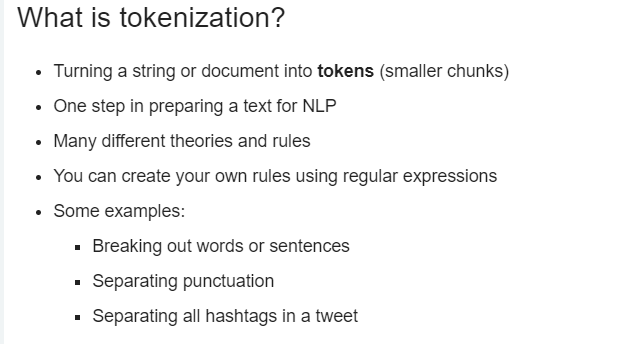

In [ ]:
from IPython.display import Image
Image(filename="3.PNG")

**NLTK is a popular NLP library. Here is the way to tokenize using NLTK**

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
word_tokenize("Hi There!")

['Hi', 'There', '!']

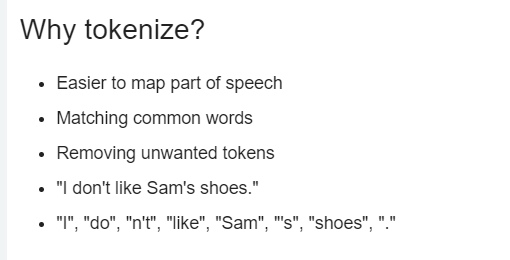

In [ ]:
from IPython.display import Image
Image(filename="4.PNG")

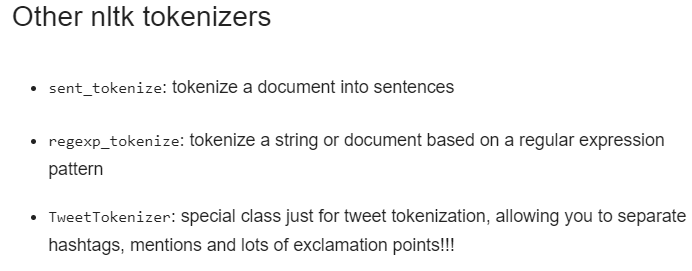

In [ ]:
from IPython.display import Image
Image(filename="5.PNG")

In [ ]:
# Import necessary modules

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [ ]:
# Text for tokenization
scene_one = "SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a temperate zone.\nARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?\nSOLDIER #1: Are you suggesting coconuts migrate?\nARTHUR: Not at all.  They could be carried.\nSOLDIER #1: What?  A swallow carrying a coconut?\nARTHUR: It could grip it by the husk!\nSOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.\nARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.\nSOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?\nARTHUR: Please!\nSOLDIER #1: Am I right?\nARTHUR: I'm not interested!\nSOLDIER #2: It could be carried by an African swallow!\nSOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.\nSOLDIER #2: Oh, yeah, I agree with that.\nARTHUR: Will you ask your master if he wants to join my court at Camelot?!\nSOLDIER #1: But then of course a-- African swallows are non-migratory.\nSOLDIER #2: Oh, yeah...\nSOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] \nSOLDIER #2: Wait a minute!  Supposing two swallows carried it together?\nSOLDIER #1: No, they'd have to have it on a line.\nSOLDIER #2: Well, simple!  They'd just use a strand of creeper!\nSOLDIER #1: What, held under the dorsal guiding feathers?\nSOLDIER #2: Well, why not?\n"

In [ ]:
# let's see the text
scene_one

"SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a t

In [ ]:
# Split scene_one into sentences: sentences

sentences = sent_tokenize(scene_one)

In [ ]:
# Print the sentences
sentences

['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!',
 '[clop clop clop] \nSOLDIER #1: Halt!',
 'Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.',
 'King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!',
 'ARTHUR: I am, ...  and this is my trusty servant Patsy.',
 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.',
 'I must speak with your lord and master.',
 'SOLDIER #1: What?',
 'Ridden on a horse?',
 'ARTHUR: Yes!',
 "SOLDIER #1: You're using coconuts!",
 'ARTHUR: What?',
 "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.",
 'ARTHUR: So?',
 "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?",
 'ARTHUR: We found them.',
 'SOLDIER #1: Found them?',
 'In Mercea?',
 "The coconut's tropic

In [ ]:
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
# Note that python starts its indices from 0
tokenized_sent = word_tokenize(sentences[3])

In [ ]:
# Print the word tokens
tokenized_sent

['ARTHUR',
 ':',
 'It',
 'is',
 'I',
 ',',
 'Arthur',
 ',',
 'son',
 'of',
 'Uther',
 'Pendragon',
 ',',
 'from',
 'the',
 'castle',
 'of',
 'Camelot',
 '.']

In [ ]:
# Prinitng the 4th sentence in the text
sentences[3]

'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.'

In [ ]:
# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

In [ ]:
# Print the unique tokens result
print(unique_tokens)

{'then', 'No', 'go', 'maintain', 'this', 'Wait', "n't", 'Arthur', 'temperate', 'through', ':', '--', 'suggesting', 'Oh', 'why', 'SCENE', 'of', 'Ridden', 'It', 'KING', 'sovereign', 'swallows', 'with', 'one', 'covered', 'house', 'coconut', 'they', 'servant', 'Are', 'breadth', 'its', 'use', 'dorsal', "'d", 'interested', 'to', 'agree', 'ask', 'goes', 'zone', 'That', 'you', 'trusty', 'course', 'but', ',', 'and', "'s", 'The', 'who', 'swallow', 'Camelot', 'Listen', 'search', '2', 'an', 'anyway', "'em", 'lord', 'climes', 'may', 'tell', 'Found', 'will', 'have', 'my', 'snows', 'other', 'Pendragon', 'two', 'pound', 'these', 'non-migratory', 'from', 'feathers', "'m", 'strand', 'found', 'knights', 'Will', 'not', ']', 'them', 'defeator', 'England', 'court', 'a', 'coconuts', 'are', 'forty-three', '1', 'European', 'bangin', 'it', 'What', "'", 'warmer', 'there', 'south', 'Saxons', 'at', 'the', 'here', 'son', 'Yes', 'got', 'land', 'all', 'winter', 'second', 'Supposing', 'They', 'grip', 'under', 'plover'

***HINT***

Use the command from y import x to import x from y.

Use the sent_tokenize() function to tokenize the sentences in scene_one.

Use word_tokenize() to tokenize the appropriate sentence in sentences. Remember, Python uses 0-based numbering.

After using word_tokenize() on scene_one, use the set() function to convert it into a set.

In [ ]:
# text for testing
scene_one1 = 'coc coconuts coconuts'

In [ ]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one1)
test(match)

Match object: <re.Match object; span=(4, 12), match='coconuts'>
span of match: (4, 12)
start index of match 4
end index of match 12
matched string: coconuts


In [ ]:
# Search for all occurrences of coconuts
match = re.findall("coconuts", scene_one1)
print('Number of times it occurred:',len(match))

Number of times it occurred: 2


In [ ]:
# Write a regular expression to search for first occurrence of anything in square brackets: pattern1
pattern1 = r"Enter guess here"  ### answer is \[.*\]

# Use re.search to find the first text in square brackets
m = re.search(pattern1, scene_one)
print('First text in square brackets:',m.group())

First text in square brackets: [wind] [clop clop clop]


In [ ]:
# Ans: \[.*\]

In [ ]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"Enter guess here"#answer is [\w\s]+:
m = re.match(pattern2, sentences[3])
print('Script notation at the beginning of the fourth sentence is:',m.group())

Script notation at the beginning of the fourth sentence is: ARTHUR:


In [ ]:
#Ans: [\w\s]+:

Note : The / Is the beginning of a regex (regular expression). The \w looks for all word characters in a string. A word character is a character from a-z, A-Z, 0-9, including the _ (underscore) character. Now the \S is any character that is NOT a whitespace character. You were confusing it with \s(lowercase) which is for whitespace characters. The * is a character that says to look for n zero or more times, where n is the metacharacter(the backslash tokens in the regex) in the regex. Hope this helped a little.

#### Advance tokeniztion with Regex

- Regex groups using or "|"

- OR is represented using |
- You can define group using ()
- You can define explicit character ranges using []

In [ ]:
# Regex to match digits or words
match_digit_and_words = ('(\d+|\w+)')

In [ ]:
# Suppose your tokens are words and numbers
re.findall(match_digit_and_words, 'He has 11 cats.')

['He', 'has', '11', 'cats']

In [ ]:
# Check that when inside square brackets, '|' loses its meaning
# Whereas when escaped , we have spaces metacharacter
print(re.findall('[\s+|,]','p ,p x s,|'))
print(re.findall('(\s+|,)','p ,p x s,|'))
print(re.findall('\s+|,','p ,p x s,|'))

[' ', ',', ' ', ' ', ',', '|']
[' ', ',', ' ', ' ', ',']
[' ', ',', ' ', ' ', ',']


Example :

In [ ]:
import re

my_str = 'match lowercase spaces nums like 12, but no commas'

In [ ]:
re.match('[a-z0-9 ]+', my_str).group()

'match lowercase spaces nums like 12'

#### Excercise :
    
**Choosing a tokenizer**

Given the following string, which of the below patterns is the best tokenizer? If possible, you want to retain sentence punctuation as separate tokens, but have '#1' remain a single token.

In [ ]:
my_string = "Employee #1: Found them? On the New York aws server? The one that's not even running!"

The string is available in your workspace as my_string, and the patterns have been pre-loaded as pattern1, pattern2, pattern3, and pattern4, respectively.

Additionally, regexp_tokenize has been imported from nltk.tokenize. You can use regexp_tokenize() with my_string and one of the patterns as arguments to experiment for yourself and see which is the best tokenizer.

In [ ]:
pattern1 = r'(\w+\?\s!)'
pattern1

'(\\w+\\?\\s!)'

In [ ]:
pattern2 = r'(\w+|#\d+|\?+!)'

In [ ]:
pattern3 = r'\d+\w+\?'

In [ ]:
pattern4 = r'\s+'

In [ ]:
import re
from nltk.tokenize import regexp_tokenize

In [ ]:
# Test string
my_string

"Employee #1: Found them? On the New York aws server? The one that's not even running!"

In [ ]:
# Using Pattern1 to tokenize
re.findall(pattern1, my_string)

[]

In [ ]:
# Using Pattern2 to tokenize
re.findall(pattern2, my_string)

['Employee',
 '#1',
 'Found',
 'them',
 'On',
 'the',
 'New',
 'York',
 'aws',
 'server',
 'The',
 'one',
 'that',
 's',
 'not',
 'even',
 'running']

In [ ]:
# Using Pattern3 to tokenize
re.findall(pattern3, my_string)

[]

In [ ]:
# Using pattern4 to tokenize
re.findall(pattern4, my_string)

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

It is clear that pattern2 is the best tokenizer

**Excercise : Regex with NLTK tokenization**

Twitter is a frequently used source for NLP text and tasks. In this exercise, you'll build a more complex tokenizer for tweets with hashtags and mentions using nltk and regex. The nltk.tokenize.TweetTokenizer class gives you some extra methods and attributes for parsing tweets.

Here, you're given some example tweets to parse using both TweetTokenizer and regexp_tokenize from the nltk.tokenize module. These example tweets have been pre-loaded into the variable tweets. Feel free to explore it in the 

**Instruction :**

- From nltk.tokenize, import regexp_tokenize and TweetTokenizer.

- A regex pattern to define hashtags called pattern1 has been defined for you. Call regexp_tokenize() with this hashtag pattern on the first tweet in tweets.

- Write a new pattern called pattern2 to match mentions and hashtags. A mention is something like @DataCamp. Then, call regexp_tokenize() with your new hashtag pattern on the last tweet in tweets. You can access the last element of a list using -1 as the index, for example, tweets[-1].

- Create an instance of TweetTokenizer called tknzr and use it inside a list comprehension to tokenize each tweet into a new list called all_tokens. To do this, use the .tokenize() method of tknzr, with t as your iterator variable.

HINT :
    

Import x from y using from y import x.
The first argument to regexp_tokenize() is tweets[0]; the hashtag pattern is second.
To create pattern2, use r"([@#]\w+)". Use it with regexp_tokenize() as you did above.
Use TweetTokenizer() to create tknzr. Then, in the output expression of your list comprehension, use the .tokenize() method of tknzr. Use t as your iterator variable and tweets as your iterable.

In [ ]:
# Import the necessary modules
import re
from nltk.tokenize import regexp_tokenize, TweetTokenizer

In [ ]:
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"Enter guess here"

In [ ]:
#Ans: #\w+\s

In [ ]:
# list of tweets
tweets= ['This is the best #nlp exercise ive found online! #python is good','#NLP is super fun! <3 #learning','Thanks @datacamp :) #nlp #python']

In [ ]:
# Use the pattern on the first tweet in the tweets list
regexp_tokenize(tweets[0],pattern1)

In [ ]:
# Write a pattern that matches both mentions and hashtags

pattern2 = r"Enter guess here"

In [ ]:
# Ans: ([@#]\d+|[@#]\w+)

In [ ]:
# Use the pattern on the last tweet in the tweets list
regexp_tokenize(tweets[1], pattern2)

In [ ]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

### Excercise 

Non-ascii tokenization
In this exercise, you'll practice advanced tokenization by tokenizing some non-ascii based text. You'll be using German with emoji!

Here, you have access to a string called german_text, which has been printed for you in the Shell. Notice the emoji and the German characters!

The following modules have been pre-imported from nltk.tokenize: regexp_tokenize and word_tokenize.

Unicode ranges for emoji are:

('\U0001F300'-'\U0001F5FF'), ('\U0001F600-\U0001F64F'), ('\U0001F680-\U0001F6FF'), and ('\u2600'-\u26FF-\u2700-\u27BF').

**Instruction**

- Tokenize all the words in german_text using word_tokenize(), and print the result.

- Tokenize only the capital words in german_text.

- First, write a pattern called capital_words to match only capital words. Make sure to check for the German Ü!

- Then, tokenize it using regexp_tokenize().

- Tokenize only the emoji in german_text. The pattern using the unicode ranges for emoji given in the assignment text has been written for you. Your job is to use regexp_tokenize() to tokenize the emoji.

In [ ]:
# Test string
german_text = 'Ich bin in Deutschland 🇩🇪 geboren, aber türkisch-amerikanisch 🇹🇷 - 🇺🇸'

In [ ]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

In [ ]:
# Tokenize and print only capital words
capital_words = r"Enter your answer here"
print(regexp_tokenize(german_text, capital_words))

In [ ]:
# Ans:[A-ZÜ]\w+

In [ ]:
# Emoji Pattern
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"

In [ ]:
print(regexp_tokenize(german_text, emoji))

- A .  in regex is a metacharacter, it is used to match any character. 
- To match a literal dot, you need to escape it, so  \.
- Also, you need \w+ instead of \w to match one or more word.
- In your regex you need to escape the dot(.) - "\." or use it inside a character class - "[.]", as it is a meta-character in regex, which matches any character.

### Searching for Patterns in Text

One of the most common uses for the re module is for finding patterns in text. Let's do a quick example of using the search method in the re module to find some text:

In [ ]:
import re

# List of patterns to search for
patterns = ['term1', 'term2']

# Text to parse
text = 'This is a string with term1, but it does not have the other term.'

for pattern in patterns:
    print('Searching for "%s" in:\n "%s"\n' %(pattern,text))
    
    #Check for match
    if re.search(pattern,text):
        print('Match was found. \n')
    else:
        print('No Match was found.\n')

Now we've seen that <code>re.search()</code> will take the pattern, scan the text, and then return a **Match** object. If no pattern is found, **None** is returned. To give a clearer picture of this match object, check out the cell below:

In [ ]:
# List of patterns to search for
pattern = 'term1'

# Text to parse
text = 'This is a string with term1, but it does not have the other term.'

match = re.search(pattern,text)

print('Type of match object',type(match))

This **Match** object returned by the search() method is more than just a Boolean or None, it contains information about the match, including the original input string, the regular expression that was used, and the location of the match. Let's see the methods we can use on the match object:

In [ ]:
# Show start of match
match.start()

In [ ]:
# Show end
match.end()

### Split with regular expressions

Let's see how we can split with the re syntax. This should look similar to how you used the split() method with strings.

In [ ]:
# Term to split on
split_term = '@'

phrase = 'What is the domain name of someone with the email: gotohell@gmail.com'

# Split the phrase
re.split(split_term,phrase)

Note how <code>re.split()</code> returns a list with the term to split on removed and the terms in the list are a split up version of the string. Create a couple of more examples for yourself to make sure you understand!

### Finding all instances of a pattern

You can use <code>re.findall()</code> to find all the instances of a pattern in a string. For example:

In [ ]:
# Returns a list of all matches
re.findall('match','test phrase match is in middle')

## Examples of Applications of RE

In [ ]:
Image(filename="edu_re2.PNG")

In [ ]:
Image(filename="edu_re3.PNG")

In [ ]:
# Extracting name and age from text
import re
Nameage = '''
Dhiksha is 22 and Tyron is 19
Onur is 35 and Arman is 47
'''

ages=re.findall(r'\d{1,3}',Nameage)
print(ages)
names=re.findall(r'[A-Z][a-z]*',Nameage)
print(names)

ageDict={}

x=0

for eachname in names:
    ageDict[eachname] = ages[x]
    x+=1
    
print(ageDict)

In [ ]:
regex = re.compile(r"(\w+) Lamb") 
text = "Mary had a little Lamb" 
result = regex.search(text)
print('Determining the description for lamb:',result.group())

In [ ]:
# Extracting the email address from text
reg_mail = "[a-zA-Z0-9_\-]+@[a-zA-Z0-9_\-]+\.[a-zA-Z0-9_\-]+"
test = "this is my email id : dhiksha@gmail.com. dhiksha@hindsightsolutions.net"
re.findall(reg_mail,test)

In [ ]:
# Extracting phone number from text
num_reg = "[0-9]{3}-[0-9]{3}-[0-9]{4}"
test = "this is my number : 201-555-1234"
re.findall(num_reg,test)

In [ ]:
# Extracting the phone number from text
num_reg = "[0-9]{10}[^0-9]*$"
test = "this is my number : 2015551234"
re.findall(num_reg,test)